In [8]:
import pandas as pd

In [11]:
wine_data = pd.read_csv('Red Wine Price Prediction/Red.csv')

In [12]:
wine_data.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [13]:
wine_data['Year'] = pd.to_numeric(wine_data['Year'], errors='coerce')

In [17]:
# Finding the current year to get the age of the wine
current_year = pd.Timestamp.now().year

In [20]:
wine_data['Wine_Age'] = current_year - wine_data['Year']

In [21]:
wine_data

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Wine Age,Wine_Age
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011.0,14.0,14.0
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017.0,8.0,8.0
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015.0,10.0,10.0
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019.0,6.0,6.0
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...
8661,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016.0,9.0,9.0
8662,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016.0,9.0,9.0
8663,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010.0,15.0,15.0
8664,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019.0,6.0,6.0


In [23]:
wine_data = wine_data.dropna(subset=['Year', 'Wine_Age'])

In [24]:
wine_data = wine_data[wine_data['Wine_Age'] >= 0]

We should have the data formatted correctly so that we can derive the overall age of the wine without having to use years as inputs for the model.

At this point we're going to count (frequency) the categorical features present in the dataset. We can't use these text entries as data points so they're going to be dropped afterwards.

In [26]:
for col in ['Country', 'Region', 'Winery']:
    encoding = wine_data[col].value_counts().to_dict()
    wine_data[col + '_Frequency'] = wine_data[col].map(encoding)

In [27]:
numerical_wine_data = wine_data.drop(columns=['Country', 'Region', 'Winery', 'Name'])

In [28]:
reduced_features = [col for col in numerical_wine_data.columns if col not in ['Price']]
X_reduced = numerical_wine_data[reduced_features]
y_reduced = numerical_wine_data['Price']

In [29]:
X_reduced, y_reduced

(      Rating  NumberOfRatings    Year  Wine Age  Wine_Age  Country_Frequency  \
 0        4.2              100  2011.0      14.0      14.0               2255   
 1        4.3              100  2017.0       8.0       8.0               2255   
 2        3.9              100  2015.0      10.0      10.0               2646   
 3        3.5              100  2019.0       6.0       6.0               2646   
 4        3.9              100  2016.0       9.0       9.0                220   
 ...      ...              ...     ...       ...       ...                ...   
 8661     3.8              994  2016.0       9.0       9.0                373   
 8662     4.0              995  2016.0       9.0       9.0               2646   
 8663     3.7              996  2010.0      15.0      15.0               2255   
 8664     3.5              998  2019.0       6.0       6.0                246   
 8665     3.4              999  2016.0       9.0       9.0                246   
 
       Region_Frequency  W

Great, at this point we have our independent variable and our target variable. We're ready to start modeling!

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size = 0.2, random_state = 123)

In [33]:
from xgboost import XGBRegressor

regressor = XGBRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 6, random_state = 123)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [34]:
y_pred = regressor.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE Score: {mae}')
print(f'MSE Score: {mse}')
print(f'R2 Score: {r2}')

MAE Score: 17.999434327231267
MSE Score: 103.33488965211463
R2 Score: -0.7089533726723043


That's not great...
For MAE, that suggests that the average wine price being predicted deviates by \\$18. While that could be alright for \\$1000 wines, that's going to be a problem for cheaper sub \$20 wines.

For MSE, 103.33 indicates an extremely high variance, which suggests that the test dataset is not being properly captured

For R2, the -0.71 score suggests that the model is performing very poorly.



My first thought is obviously the dataset that we're working with. As it's on the smaller side, we may not be able to leverage the original categorical features as well with just frequency encoding. However, before addresssing that, I wanted to see about hyperparameter tuning, and see if the model is performing poorly due to a misconfiguration there. Instead of statically assigning the values, I thought about doing a grid search and seeing if I can automatically determine the best hyperparameters

In [36]:
param_grid = {'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],}

In [37]:
regressor = XGBRegressor(random_state = 123)

In [38]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = regressor, param_grid= param_grid)
grid_search.fit(X_train, y_train)

best_parameters= grid_search.best_params_
best_model = grid_search.best_estimator_


Alright after a minute of running here are the results:

In [39]:
y_pred = best_model.predict(X_test)

In [40]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE Score: {mae}')
print(f'MSE Score: {mse}')
print(f'R2 Score: {r2}')

MAE Score: 19.209919173060197
MSE Score: 89.69244463569117
R2 Score: -0.28750218828114504


Ok seems like we did about the same, with minor improvements in the MSE and R2 score. Not great... Let's take a look at feature engineering again.

First off, we're going to look at reducing the outliers in the dataset. The MSE being so high suggests that outliers are a factor within the dataset

In [42]:
new_data = wine_data.drop(columns=['Country', 'Region', 'Winery', 'Name'])

In [43]:
eng_data = new_data.copy()

In [46]:
import numpy as np
# Log normalize the dataset so that outliers are brought closer to other values
eng_data['Log_Price'] = np.log1p(eng_data['Price'])

After that, we're going to also do a bit of interaction featuring. Since the values on their own did not contribute much to the model, we're going to try pushing the combined effect of the values to help demonstrate a clear ratio between the two values that the model can capture.

In [49]:
eng_data['Wine_Age_Rating'] = eng_data['Wine_Age'] * eng_data['Rating']
eng_data['Wine_Age_Country_Frequency']  = eng_data['Wine_Age'] * eng_data['Country_Frequency']
eng_data['Rating_Count_Frequency'] = eng_data['Rating'] * eng_data['Country_Frequency']

In [50]:
engineered_features = [col for col in eng_data.columns if col not in ['Price', 'Log_Price']]
X_engineered = eng_data[engineered_features]
y_engineered = eng_data['Log_Price']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_engineered, y_engineered, test_size=0.2, random_state=123)

In [52]:
regressor = XGBRegressor(random_state = 123)

In [53]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = regressor, param_grid= param_grid)
grid_search.fit(X_train, y_train)

best_parameters= grid_search.best_params_
best_model = grid_search.best_estimator_

In [56]:
y_pred = best_model.predict(X_test)

In [57]:
y_pred_scaled = np.expm1(y_pred)
y_test_scaled = np.expm1(y_test)

In [58]:
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
mse = mean_squared_error(y_test_scaled, y_pred_scaled, squared=False)
r2 = r2_score(y_test_scaled, y_pred_scaled)

print(f'MAE Score: {mae}')
print(f'MSE Score: {mse}')
print(f'R2 Score: {r2}')

MAE Score: 14.496347134394128
MSE Score: 52.36930743324817
R2 Score: 0.5610754075788231


Ok not bad! We're seeing improvement at every metric, even suggesting that the model can explain 56% of the variance seen in the wine price. Ok, lets look into those residuals again. Despite log normalizing the data, we still seem to have a high MSE value.

In [59]:
residuals = y_test_scaled - y_pred_scaled

In [60]:
residuals_df = pd.DataFrame({'Actual': y_test_scaled, 'Predicted': y_pred_scaled, 'Residuals': residuals})

In [61]:
residuals_df

,Actual,Predicted,Residuals
7442,13.00,16.661245,-3.661245
7874,57.23,67.616676,-10.386676
3884,77.01,52.034290,24.975710
7787,15.95,16.566023,-0.616023
5178,26.00,35.550343,-9.550343
...,...,...,...
5269,31.90,59.617592,-27.717592
4297,8.53,10.429618,-1.899618
7569,19.95,39.380936,-19.430936
1901,9.60,9.513215,0.086785


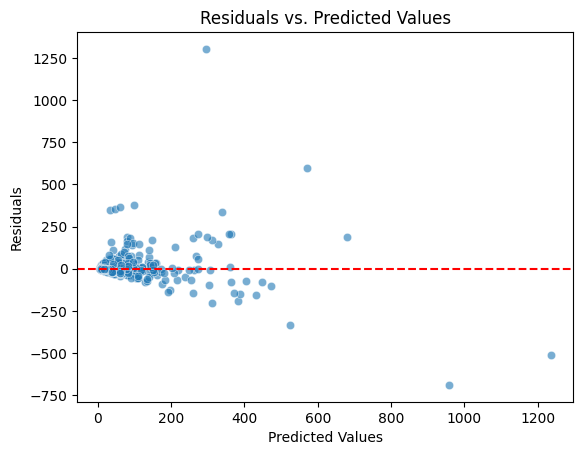

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=y_pred_scaled, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Seems like as the values start to get past the 100 mark the residuals get really far from the target line. Let's remove those wines from the dataset and re-train the model and see if it performs better. Let's set a threshold for the dataset using standard deviations from the residual mean

In [70]:
y_train_pred = best_model.predict(X_train)

y_train_scaled = np.expm1(y_train)
y_train_prediction_scaled = np.expm1(y_train_pred)

train_residuals = y_train_scaled - y_train_prediction_scaled

In [72]:
threshold = train_residuals.std() * 3
threshold

83.88164046148108

That value seems about right. Anything past that value seems to struggle

In [73]:
below_threshold_mask = train_residuals.abs() <= threshold

In [74]:
X_train_filtered = X_train[below_threshold_mask]
y_train_filtered = y_train[below_threshold_mask]

In [75]:
regressor = XGBRegressor(random_state = 123)

In [76]:
grid_search = GridSearchCV(estimator = regressor, param_grid= param_grid)
grid_search.fit(X_train_filtered, y_train_filtered)

best_parameters= grid_search.best_params_
best_model = grid_search.best_estimator_

In [77]:
y_test_pred = best_model.predict(X_test)

In [78]:
y_test_pred_scaled = np.expm1(y_test_pred)
y_test_original_scale = np.expm1(y_test)

In [79]:
mae = mean_absolute_error(y_test_original_scale, y_test_pred_scaled)
mse = mean_squared_error(y_test_original_scale, y_test_pred_scaled, squared=False)
r2 = r2_score(y_test_original_scale, y_test_pred_scaled)

print(f'MAE Score: {mae}')
print(f'MSE Score: {mse}')
print(f'R2 Score: {r2}')

MAE Score: 13.804195600007477
MSE Score: 49.171853281073425
R2 Score: 0.6130370300097964


Not too bad. Seems like we're doing better. Effectively, the model is performing alright given that we have limited the input test/train data to the values below the 'threshold' we've established. Let's take a look at hyperparameter tuning again. The training time is only 1 min so I'd like to expand upon it.

In [83]:
param_grid = {
    'n_estimators': [100, 200, 300],               
    'learning_rate': [0.01, 0.05, 0.1],           
    'max_depth': [3, 5, 7],                       
    'subsample': [0.8, 1.0],                     
    'colsample_bytree': [0.8, 1.0],        
    'gamma': [0, 0.1],   
    'min_child_weight': [1, 3]}

In [84]:
regressor = XGBRegressor(random_state = 123)

In [85]:
grid_search = GridSearchCV(estimator = regressor, param_grid= param_grid)
grid_search.fit(X_train_filtered, y_train_filtered)

best_parameters= grid_search.best_params_
best_model = grid_search.best_estimator_

In [86]:
y_test_pred = best_model.predict(X_test)

In [87]:
y_test_pred_scaled = np.expm1(y_test_pred)
y_test_original_scale = np.expm1(y_test)

In [88]:
mae = mean_absolute_error(y_test_original_scale, y_test_pred_scaled)
mse = mean_squared_error(y_test_original_scale, y_test_pred_scaled, squared=False)
r2 = r2_score(y_test_original_scale, y_test_pred_scaled)

print(f'MAE Score: {mae}')
print(f'MSE Score: {mse}')
print(f'R2 Score: {r2}')

MAE Score: 13.804195600007477
MSE Score: 49.171853281073425
R2 Score: 0.6130370300097964


Alright, no change here. Let's see how the model is performing for overfitting

In [90]:
y_train_pred = best_model.predict(X_train)
y_train_pred_scaled = np.expm1(y_train_pred)

mae_train = mean_absolute_error(y_train_scaled, y_train_pred_scaled)

print(mae_train)

9.968995618010547


In [94]:
diff = mae - mae_train
print(diff)

3.8351999819969294


In [95]:
# find the relative difference
average = eng_data['Price'].mean()

(diff/average) * 100

9.796221424779182

And there we have it, not bad. There's a relative difference of 9.80% which suggests the model may slightly overfit the data, but still performs reasonably well. 